# Data loading for CMM 536 (PART 1)

The imported dataset that was used for this image classification problem consist of 2443 images. The images have a consistent file format and they can easily be loaded and manipulated. Due to this detail, it makes data cleaning unnecessary for the vast majority of the files found in the repositories. In order to organize the data collected for the classification problem, there was a need for the datasets to be categorised into their respective folders. This would aid in the efficient training of our model later on. The dataset included the x-ray images of the wrsit, shoulder and chest images from various sources.
Kaggle was used to source all the data that was used. The datasets were useful due to them being collated.

We have to first initiate the requisite library that would be used for loading the datasets and transforming them into objects that can be manipulated in a dataframe. 

## Install initial packages that are instrumental to the loading of the image datasets.

We had to initiate pip install of the open CV library which would be crucial to solving the classification problem of the dataset. Since the problem is an image classification, it requires computer vision and the fuctionality of other machine learning libraries. It is one of the most robust open source library used for solving image classification/image recognition problems.

In [1]:
!pip install opencv-python

This is the initial librabry that would be needed in order to read the images from our dataset. This is also due to the fact that we will be making use of methods such as `cv2.imread`. It is a very instrumental tool for the completion of this project.

## Converting the images in the dataset repository into Numpy arrays

The decision to convert our images into a numpy array is due to the fact that it is easier, more convenient and faster to manipulate our data using it. Before proceeding to the final loading process, we have to import some libraries to aid the process.

In [2]:
import os #operating system module for dealing with the working directory of the datasets to be considered
import cv2 #open cv (computer vision) library for image classification
import numpy as np #numpy is meant to be used for matrice manipulation
%matplotlib inline
import matplotlib.pyplot as plt

After the installation of all the requisite libraries, we then proceed to load all the images into our standard dataframe. This is done in order for us to structure our data properly. This is an effective method for us to implement the standard practice of initializing our datasets for supervised learning.

In [3]:
import pandas as pd

In [4]:
res_w = 70 #the width of the mages were rd to 70px.This was done in order to give the pictures a sense of consistency
res_h = 70 #the height of the mages were rd to 70px.This was done in order to give the pictures a sense of consistency
path = 'dataset'
xray_pics = [] # List to append the xray_pics as 2D numpy arrays.
targ = [] # List to append the targ feature for the labelled dataset
rep_arr = [] # Create a rep_arr for flattened pixels

for root, dirs, files in os.walk(path):
     for f in files:
        with open(os.path.join(root, f), "r") as auto: # an attempt to join the file folder
            try: #error handling
                xray = cv2.imread(root+'/'+f, 0) # greyscale
                xray = cv2.resize(xray, (res_w, res_h)) 
                xray_pics.append(xray)
                # Append the flattened xray_pics to the pixel rep_arr
                rep_arr.append(xray.flatten())
                # Append the folder where the xray_pics is to the targ list
                targ.append(root.replace(path,'').replace('\\','').replace('/',''))
            except Exception as e:
                print("File error "+f+" passed.")
# Convert the rep_arr list into numpy array
rep_arr = np.array(rep_arr) 
print("This is the repository of xray_pics that will be used for the analysis")
print(rep_arr)
print(targ)

This is the repository of xray_pics that will be used for the analysis
[[  3   3   3 ...   7   7   7]
 [214 189 178 ...  11  12  44]
 [  2   2   2 ...   9  21  55]
 ...
 [  4   4   4 ...   4   4   4]
 [  4   4   5 ...   5   4   4]
 [  4   5   4 ...   4   4   3]]
['chest', 'chest', 'chest', 'chest', 'chest', 'chest', 'chest', 'chest', 'chest', 'chest', 'chest', 'chest', 'chest', 'chest', 'chest', 'chest', 'chest', 'chest', 'chest', 'chest', 'chest', 'chest', 'chest', 'chest', 'chest', 'chest', 'chest', 'chest', 'chest', 'chest', 'chest', 'chest', 'chest', 'chest', 'chest', 'chest', 'chest', 'chest', 'chest', 'chest', 'chest', 'chest', 'chest', 'chest', 'chest', 'chest', 'chest', 'chest', 'chest', 'chest', 'chest', 'chest', 'chest', 'chest', 'chest', 'chest', 'chest', 'chest', 'chest', 'chest', 'chest', 'chest', 'chest', 'chest', 'chest', 'chest', 'chest', 'chest', 'chest', 'chest', 'chest', 'chest', 'chest', 'chest', 'chest', 'chest', 'chest', 'chest', 'chest', 'chest', 'chest', 'chest'

In [5]:
rep_arr.shape

(2931, 4900)

In [6]:
len(targ)

2931

From what we can understand from the preliminery exporation of the image repository dataset, we can see that the repository has a total of `2931` images with 4900 distinct columns that would be used from assiting us build a functional predictive model. The size of the columns is attributed to the width and height specified in our code above. 

The files that were imported were put into a 2D (2-dimensional) vector. A loop was used in conjunction with the `os` module in order to have access to the local file directory system. The looping procedure which was enabled by the `os` module, aided in importing the images which was later converted into an array for easy data manipulation for the training of our model. The major reason for converting the images into an array is due to the fact that computers can only work with numbers in order to make sense of it to provide informative insights from the underlying patterns, hence the need for the conversion.
Prior to the assigning of the images to the given variables, we also needed to resize them. This is done for the sake of consistency in size. The `cv2.imread` method was instrumental for the accessing of the images that were located in their individual folders. When we apply our machine learning method to answer the image classification issue in the future, this will make manipulating the pandas dataframe easier.

We have to emphasize the fact that selecting the x-ray photographs that were included in this project was a painstaking procedure due to the fact that some of the images featured details that would severely affect the workability of our model. This was a manual process that took a bit of time and had no alternative of being automated with python code.

## Data Preprocessing

Before we can proceed to build our model from scratch, we have to make sure that it is in the right format before going forward.

Use a list comprehension to encode the data to be useable by our machine learning model, where the `chest` would be defined as `0`, `shoulder` would be `1`, and `wrist` would `2`.

In [7]:
targ = [0 if i == "chest" else 1 if i == "shoulder" else 2 for i in targ]

In [8]:
targ = np.array(targ)
targ

array([0, 0, 0, ..., 2, 2, 2])

In [9]:
# This is done in a bid to manipulate the target data to be acceptable later on. 
targ.shape

(2931,)

## Split test for the dataset - Train and test of the data (70 - 30)

As specified in the instruction, we have to conduct a 70-30 split on the dataset where 70% of the data supplied would be for training, while 30% of the same dataset would be for testing of the data. 

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(rep_arr, 
                                                    targ, 
                                                    test_size=0.30, 
                                                    stratify = targ,
                                                    random_state=43)

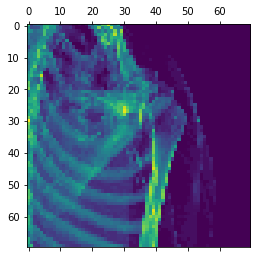

In [30]:
plt.matshow(X_train[0])

In [41]:
X_train.shape

(2051, 4900)

In [42]:
X_test.shape

(880, 4900)

In [43]:
y_train.shape

(2051,)

In [44]:
y_test.shape

(880,)

In [45]:
rows, cols = 70, 70 #size of the image imported into our numpy array

X_train = X_train.reshape(X_train.shape[0], rows, cols)
X_test = X_test.reshape(X_test.shape[0], rows, cols)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [46]:
X_train.shape

(2051, 70, 70)

In [47]:
#Normalization of our independent training and test dataset
X_train /= 255.0
X_test /= 255.0

## Building the neural network using Tensorflow/ Keras

In [48]:
#!pip install tensorflow
#install the tensorflow package to access keras

In [49]:
#import libraries that would be used for developing the CNN
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization

In [50]:
batch_size = 256
epochs = 5
input_shape = (rows, cols)

## Training of the Model Using CNN (Convolutional Neural Network)

Here we will engage in hyper-parameter tuning in order to achieve a desireable result with the model we are running. 

In [104]:
model = Sequential()

model.add(Flatten(input_shape=[70, 70]))
model.add(Dense(70, activation="relu"))
model.add(Dense(3, activation="softmax")) # Due to the fact that there are 3 classses available

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 4900)              0         
                                                                 
 dense_18 (Dense)            (None, 70)                343070    
                                                                 
 dense_19 (Dense)            (None, 3)                 213       
                                                                 
Total params: 343,283
Trainable params: 343,283
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras import datasets, layers, models

cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(70, 70, 1)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(input_shape=[70, 70]),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 68, 68, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 34, 34, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 16384)             0         
                                                                 
 dense_7 (Dense)             (None, 3000)             

## Classification report for the model 

In [105]:
# optimizer = tf.keras.optimizers.Adam(learning_rate=1)
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer='adam',
              metrics=["accuracy"])

In [106]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
65/65 [==============================] - 1s 6ms/step - loss: 0.3248 - accuracy: 0.9044
Epoch 2/10
65/65 [==============================] - 0s 6ms/step - loss: 0.0984 - accuracy: 0.9732
Epoch 3/10
65/65 [==============================] - 0s 7ms/step - loss: 0.0749 - accuracy: 0.9815
Epoch 4/10
65/65 [==============================] - 0s 7ms/step - loss: 0.0557 - accuracy: 0.9859
Epoch 5/10
65/65 [==============================] - 0s 7ms/step - loss: 0.0370 - accuracy: 0.9893
Epoch 6/10
65/65 [==============================] - 0s 7ms/step - loss: 0.0364 - accuracy: 0.9902
Epoch 7/10
65/65 [==============================] - 1s 9ms/step - loss: 0.0239 - accuracy: 0.9922
Epoch 8/10
65/65 [==============================] - 0s 7ms/step - loss: 0.0262 - accuracy: 0.9951
Epoch 9/10
65/65 [==============================] - 0s 7ms/step - loss: 0.0167 - accuracy: 0.9966
Epoch 10/10
65/65 [==============================] - 0s 7ms/step - loss: 0.0178 - accuracy: 0.9956


In [107]:
model.evaluate(X_test,y_test)

28/28 [==============================] - 0s 4ms/step - loss: 0.0761 - accuracy: 0.9807


[0.07609204947948456, 0.980681836605072]

As you can see, the loss function of the model is 0.07, while the accuracy of the model is 94%. We can go a step further and explain the model in a report.

### Classification report of the model

In [56]:
from sklearn.metrics import confusion_matrix , classification_report
y_pred = model.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       326
           1       0.97      1.00      0.98       284
           2       0.99      0.96      0.97       270

    accuracy                           0.98       880
   macro avg       0.98      0.98      0.98       880
weighted avg       0.98      0.98      0.98       880



From the initial test, we can see that the model yielded an accuracy of 94.7%. This is after evaluating its predictive capabilities on the stratified data that was reserved for validation.

In [57]:
yp = model.predict(X_test)

In [58]:
class_labels = ["chest","wrist","shoulder"]

In [59]:
class_labels[np.argmax(yp[0])]

'chest'

The above code was executed to confirm that the dataset was loaded accurately due to the high accuracy of the model. As we can see, the model can confirm the data.

## Random Undersampling of the dataset 

In [142]:
rep_arr_df = pd.DataFrame(rep_arr)
targ_df = pd.DataFrame(targ)
targ_df.rename({0:'target'},axis=1,inplace = True)

df = pd.concat([rep_arr_df, targ_df],axis=1)


count_class_0, count_class_1, count_class_2 = df.target.value_counts()

# # # Divide by class
df_class_0 = df[df['target'] == 0]
df_class_1 = df[df['target'] == 1]
df_class_2 = df[df['target'] == 2]

We will will use the `shoulder (2)` dataset as a reference in order to decrease the frequency of the other class features.

In [ ]:
# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_2)
df_class_1_under = df_class_1.sample(count_class_2)
df_test_under = pd.concat([df_class_0_under, df_class_1_under,df_class_2], axis=0)

print('Random under-sampling:')
print(df_test_under.target.value_counts())

And just like that, we have created a balanced sample set using undersampling method for our dataset. Let us use this as a reference and see how it would give us a different result.

## Random Forest

In [ ]:
import pandas as pd
df = pd.DataFrame(rep_arr)
df['target'] = targ

In [ ]:
df

In [ ]:
X = df.drop('target',axis='columns')
y = df.target

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20)
model.fit(X_train, y_train)

In [ ]:
model.score(X_test, y_test)

From the above score of the random forest classifier, the model has an accuracy of 99.2%. This is oddly high. 

In [ ]:
y_predicted = model.predict(X_test)

## Confusion Matrix

In order for us to visualize our the accuracy of the model's prediction, we have to use a confusion matrix to get a better perspective.

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

From what we can see below, the worst prediction the model made, was guessing that the passed input was a wrist instead of a shoulder 5 times.

## Using random Forest with our underbalanced dataset


In [ ]:
X = df_test_under.drop('target',axis='columns')
y = df_test_under.target

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20)
model.fit(X_train, y_train)

In [ ]:
model.score(X_test, y_test)

From the above score of the random forest classifier, the model has an accuracy of 99.2%. This is oddly high. 

In [159]:
classes = ["chest","shoulder","wrist"]

In [33]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

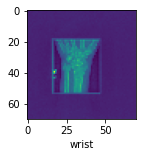

In [164]:
plot_sample(X_test, y_test, 15)

In [ ]:
y_predicted = model.predict(X_test)

In [ ]:
y_classes = [np.argmax(element) for element in y_predicted]
y_classes[:5]

From what we can see from the two models that were ran on the x-ray dataset, they have a high level of accuracy when predicting the outcome of classifying the dataset. Another thing to note was that the accuracy of the model reduced slightly when we used the underbalanced dataset on the Random forest classifier model.

## Conclusion

From what we have discovered about the two models discussed, it would seem that random forest gives a higher level of accuracy than CNN. Something to note about the model for the unaltered dataset is that it fails most of its prediction due to it having the least representation. From waht we can say about this project, this model is good enough to make an accurate prediction on any passed dataset.

# References
1. Chest x-ray repository from Kaggle: https://www.kaggle.com/tawsifurrahman/tuberculosis-tb-chest-xray-dataset. A colection of x-rays for tuberculosis identification.
2. wrist x-ray images: https://www.kaggle.com/ardacanuckan/bone-classification-and-detection-dataset
3. shoulder x-ray image from kaggle: https://www.kaggle.com/dryari5/shoulder-xray-classification